In [ ]:
# Enoncé
Afficher les 3 dataframes correspondant aux demandes:
stars by_birthyear, movies by_title_part, stats par acteur (appel API Rest)
Afficher les figures:
Répartition par année des films et naissances de star: 2 graphes (post traitement pandas)
Diagramme barres sur la carrière du top 10 acteurs : 1 graphe nombre, 1 graphe années min/max 


In [72]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import requests
from datetime import datetime

In [20]:
#utils

def render(df, msg):
    print('\n----- %s -----\n' %msg, df)

In [26]:
#Data frames

x = 'Stars by birth year'
year = 2000
df_stars_by_birthyear = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
render(df_stars_by_birthyear, x)

y = 'Movies by title part'
part = 'bob'
df_movies_by_titlepart = pd.read_json(f'http://localhost:8000/movies/by_title_part/?t={part}')
render(df_movies_by_titlepart, y)

z = 'Stats by actor'
min_movie_count = 8
df_actor_stats = pd.read_json(f'http://localhost:8000/stars/stats_by_actor?min_count={min_movie_count}')
render(df_actor_stats, z)


----- Stars by birth year -----
                    name   birthdate       id
0  Carly Jordan Pancher  2000-01-01  2642277
1            Haley Nero  2000-01-01  2002634
2      Meredith Droeger  2000-01-01  2776169
3        Preston Bailey  2000-01-01  2259079

----- Movies by title part -----
   title  year  duration        id
0   bob  2000        20  11911993

----- Stats by actor -----
                      name  movie_count  first_movie_year  last_movie_year
0          Clint Eastwood           43              1955             2018
1        Alfred Hitchcock           40              1927             2018
2              John Wayne           26              1929             1976
3            Sean Connery           18              1957             2003
4           Harrison Ford           18              1973             2019
5   Arnold Schwarzenegger           14              1973             2017
6      Sylvester Stallone           14              1978             2011
7          George

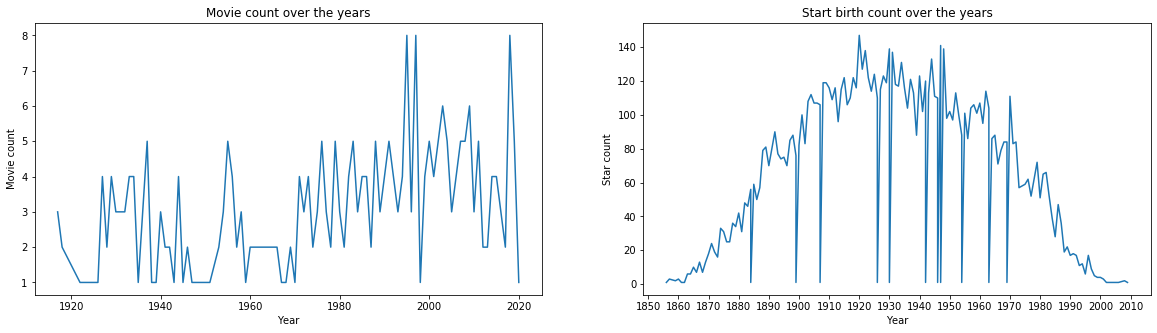

In [87]:
# Plots

#Répartition par année des films
res = requests.get('http://localhost:8000/movies/count_by_year')
assert res.status_code == 200 # Did we receive something or error ?
json = res.json()  
flatten = [ {'year' : year, 'movie_count': movie_count} for year, movie_count in json]
movie_by_year = pd.DataFrame(flatten).set_index('year')

# et naissances de star: 2 graphes (post traitement pandas)
res = requests.get('http://localhost:8000/stars/count_by_birthyear')
assert res.status_code == 200
json = res.json()
flatten = [ {'year' : year, 'star_count': count} for year, count in json]
star_by_year = pd.DataFrame(flatten).set_index('year').iloc[::-1] # Reverse year ordering (from old to new) 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.set_xlabel('Year')
ax1.set_ylabel('Movie count')
ax2.set_xlabel('Year')
ax2.set_ylabel('Star count')
ax1.set_title('Movie count over the years')
ax2.set_title('Star birth count over the years')
# better year rendering
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax1.plot(movie_by_year)
ax2.plot(star_by_year)

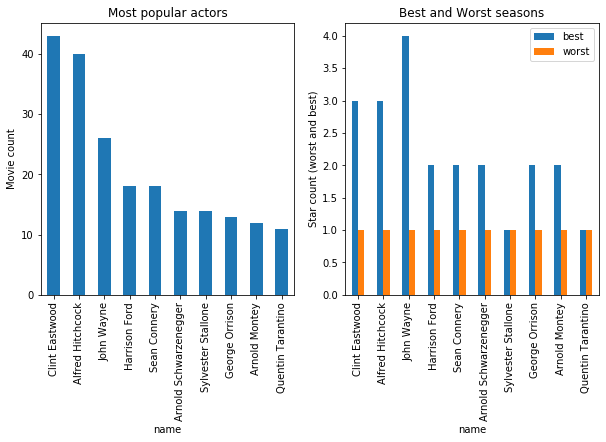

In [107]:
# Diagramme barres sur la carrière du top 10 acteurs : 1 graphe nombre, 1 graphe années min/max
topk = 10
df_best = pd.read_json(f'http://localhost:8000/stars/best_actors?topk={topk}')
df_best.set_index('name', inplace=True)
counts = df_best['movie_count']
minmax = df_best[['best', 'worst']]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_xlabel('Actors')
ax1.set_ylabel('Movie count')
ax2.set_xlabel('Actors')
ax2.set_ylabel('Star count (worst and best)')
ax1.set_title('Most popular actors')
ax2.set_title('Best and Worst seasons')
# better year rendering
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))

counts.plot(ax=ax1, kind='bar')
minmax.plot(ax=ax2, kind='bar')
